Bias:-
[0.06, 0.01, 0.04, 0.04, 0.07, 0.07, 0.02, 0.05, 0.09, 0.07]
Variance:-
['0.1250', '0.1320', '0.1560', '0.1380', '0.1380', '0.1570', '0.1300', '0.1280', '0.1360', '0.1440']


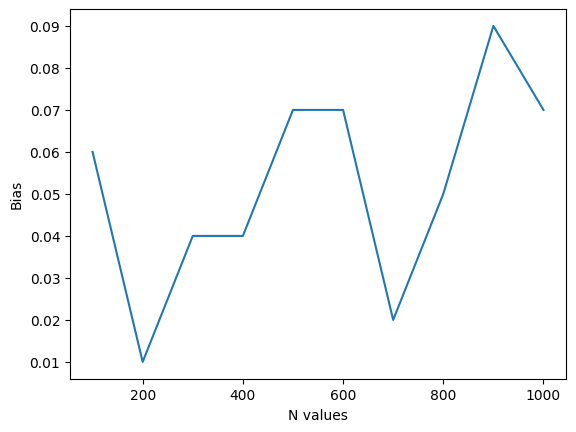

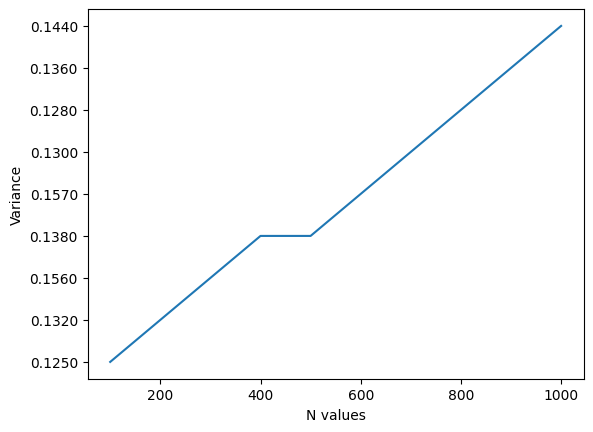

In [1]:
from csv import reader
from ctypes.util import find_library
from dis import dis
from math import sqrt
import csv
import math
from statistics import variance
from turtle import distance
import numpy as np
from csv import reader
from math import sqrt
from random import seed
from random import randrange
import matplotlib.pyplot as plt

def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (float(row1[i]) - float(row2[i]))**2
	return sqrt(distance)

def get_neighbors(train,test_row,k):
    distance=[]
    for tra_row in train:
        dist = euclidean_distance(test_row,tra_row)
        distance.append((tra_row,dist))
    distance.sort(key=lambda tup:tup[1])
    neighbors=[]
    for i in range(k):
        neighbors.append(distance[i][0])
    return neighbors    

def knn(train, test_row,k):  
	neighbors = get_neighbors(train, test_row,k)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values))
	return prediction

def knn_test(train,test_row,k,n):
    y =[]
    i=0
    while i < 10*n:
     y.append(knn(train[slice(i,i+n)],test_row,k))
     i += n
    return y 

cov = np.array([[1, 0], [0, 1]])
#generating test data
class1 = np.random.multivariate_normal([0, 0], cov, 50)
class1 = np.insert(class1, 2, 1, axis=1)
class2 = np.random.multivariate_normal([0, 2], cov, 50)
class2 = np.insert(class2, 2, 2, axis=1)
with open('test.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(class1)
    writer.writerows(class2)

#finding y* values
def find_y(testset):
 m1 = np.array([0,0])
 m2 = np.array([0,2])   
 Bayes_prediction = []
 for item in testset:
    x = np.array([float(item[0]),float(item[1])])
    mat1 = x - m1
    mat2 = x - m2
    val1 = (-1/2)*(mat1.dot(mat1.T))
    val2 = (-1/2)*(mat2.dot(mat2.T))
    val1 =(math.exp(val1))
    val2 =(math.exp(val2))
    if val1 >=val2:
        Bayes_prediction.append('1')
    else:
        Bayes_prediction.append('2')
 return Bayes_prediction

testname = 'test.csv' #test data set
testset = load_csv(testname)
Bayes_prediction = find_y(testset)

#generating training data
def generate_n_dataset(n):
 k = 100
 count =0
 while count < 10:
      count += 1
      class1 = np.random.multivariate_normal([0, 0], cov, int(n/2))

      class1 = np.insert(class1, 2, 1, axis=1)

      class2 = np.random.multivariate_normal([0, 2], cov, int(n/2))
        
      class2 = np.insert(class2, 2, 2, axis=1)
      
      with open('data.csv', 'a', newline='') as csvfile:
             writer = csv.writer(csvfile)
             for row in class1:
                 writer.writerow(row)
             for row in class2:
                 writer.writerow(row)
 
num_neighbors = 1
trainname = 'data.csv'# training data set
n = 100
Bias_arr = []
Variance_arr = []
n_arr = [100,200,300,400,500,600,700,800,900,1000]
while n <= 1000:
 generate_n_dataset(n)   
 dataset = load_csv(trainname)
 with open('data.csv', 'a', newline='') as csvfile:
  csvfile.truncate(0)
 j =0 
 Bias = []
 variance=[]
 for row in testset:
   label = knn_test(dataset,row,num_neighbors,n)
   ym = max(set(label),key=label.count)
   if float(ym) == float(Bayes_prediction[j]):
     Bias.append(0)
   else:
     Bias.append(1)  
   j +=1  
   freq = label.count(ym)
   vari = 10 - freq
   variance.append(vari/10)  
 sum_bias =(1/100)*(sum(Bias))
 sum_variance = (1/100)*(sum(variance)) 
 Bias_arr.append(sum_bias)
 Variance_arr.append("{:.4f}".format(sum_variance))
 n +=100

print("Bias:-")
print(Bias_arr)
print("Variance:-")
print(Variance_arr)

x = np.array(n_arr)  # X-axis points
y = Bias_arr # Y-axis points
plt.xlabel('N values')
plt.ylabel('Bias')  
plt.plot(x, y)  # Plot the chart
plt.show() 


x = np.array(n_arr)  # X-axis points
y = Variance_arr # Y-axis points
plt.xlabel('N values')
plt.ylabel('Variance')  
plt.plot(x, y)  # Plot the chart
plt.show()